## Python for Data Analysis - C02

## 1. usagov_bitly_data

In [1]:
# 단축 url로 미국 정부 사이트에 접속한 사용자 정보.

In [2]:
path = 'data/usagov_bitly_data2012-03-16.txt'
open(path).readline()   # 1 line

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
records = [json.loads(line) for line in open(path, encoding='utf-8')]   # 각 라인별로 json.loads 함수 적용.
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Time Zone 집계

In [4]:
# 'tz' 없는 항목 체크하여 제외.
tz = [rec['tz'] for rec in records if 'tz' in rec and len(rec['tz'])>0]   # --> list
tz[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York']

In [5]:
len(tz)

2919

In [6]:
# timezone 빈도수 집계

In [7]:
def get_counts(sequence):
    tzDic = {}
    for x in sequence:            
        if x in tzDic:
            tzDic[x] += 1
        else:
            tzDic[x] = 1
    return tzDic

In [8]:
counts = get_counts(tz)
counts.keys()

dict_keys(['America/New_York', 'America/Denver', 'America/Sao_Paulo', 'Europe/Warsaw', 'America/Los_Angeles', 'Asia/Hong_Kong', 'Europe/Rome', 'Africa/Ceuta', 'Europe/Madrid', 'Asia/Kuala_Lumpur', 'Asia/Nicosia', 'Europe/London', 'Pacific/Honolulu', 'America/Chicago', 'Europe/Malta', 'Europe/Lisbon', 'Europe/Paris', 'Europe/Copenhagen', 'America/Mazatlan', 'Europe/Dublin', 'Europe/Brussels', 'America/Vancouver', 'Europe/Amsterdam', 'Europe/Prague', 'Europe/Stockholm', 'America/Anchorage', 'Asia/Bangkok', 'Europe/Berlin', 'America/Rainy_River', 'Europe/Budapest', 'Asia/Tokyo', 'Europe/Vienna', 'America/Phoenix', 'Asia/Jerusalem', 'Asia/Karachi', 'America/Bogota', 'America/Indianapolis', 'America/Montreal', 'Asia/Calcutta', 'Europe/Skopje', 'Asia/Beirut', 'Australia/NSW', 'Chile/Continental', 'America/Halifax', 'America/Edmonton', 'Europe/Bratislava', 'America/Recife', 'Africa/Cairo', 'Asia/Istanbul', 'Asia/Novosibirsk', 'Europe/Moscow', 'Europe/Sofia', 'Europe/Ljubljana', 'America/Mexic

In [9]:
counts['Asia/Seoul']

5

In [10]:
# 상위 10개 timezone

In [11]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]   # sorting을 위해 value를 앞에 위치.
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [12]:
top_counts(counts)

[(28, 'Europe/Berlin'),
 (33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (1251, 'America/New_York')]

In [13]:
# 상위 10개 - Counter 함수 사용

In [14]:
from collections import Counter

In [15]:
counts = Counter(tz)
counts.most_common(10)

[('America/New_York', 1251),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28)]

### pandas로 Time Zone 집계

In [16]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

In [17]:
df = DataFrame(records)   # json으로 읽은 내용을 dataframe으로 변환.
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [18]:
tz_counts = df['tz'].value_counts()   # = dataframe row count
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [19]:
clean_tz = df['tz'].fillna('Missing')   # NA 처리
clean_tz[clean_tz == ''] = 'Unknown'    # 값 없는 것 처리
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

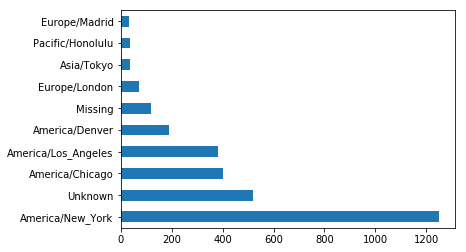

In [21]:
plt.figure()
tz_counts[:10].plot(kind='barh')   # plt 레이어 위에 dataframe.plot

#### OS 집계

In [22]:
df.a[0].split()   # split string

['Mozilla/5.0',
 '(Windows',
 'NT',
 '6.1;',
 'WOW64)',
 'AppleWebKit/535.11',
 '(KHTML,',
 'like',
 'Gecko)',
 'Chrome/17.0.963.78',
 'Safari/535.11']

In [23]:
results = Series([x.split()[0] for x in df.a.dropna()])  # a:useragent. NA 항목 제외. --> Series로 리턴
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [24]:
# null 항목 제외하고 Win / Not Win 구분

In [25]:
odf = df[df.a.notnull()]
odf.a.head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [26]:
browserOS = np.where(odf['a'].str.contains('Windows'), 'Windows', 'Not Windows')
browserOS

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [27]:
# Grouping by timezone & os

In [28]:
by_tz_os = odf.groupby(['tz', browserOS])
print(by_tz_os)

In [29]:
agg_counts = by_tz_os.size().unstack().fillna(0)   # size : 그룹별 갯수 집계 / unstack : 결과를 표로 재배치.
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [30]:
indexer = agg_counts.sum(1).argsort()  # Asc. 표시된 값은 각 항목의 sorting된 인덱스 값.
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [31]:
count_subset = agg_counts.take(indexer)[-10:]  # 상위 10개
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


<Figure size 432x288 with 0 Axes>

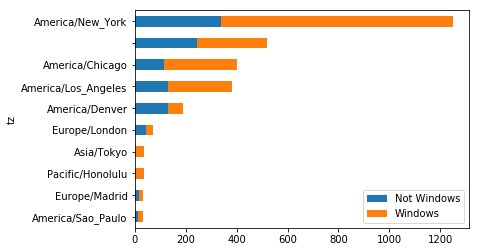

In [32]:
plt.figure()
count_subset.plot(kind='barh', stacked=True)  # stacked : 중첩 그래프

<Figure size 432x288 with 0 Axes>

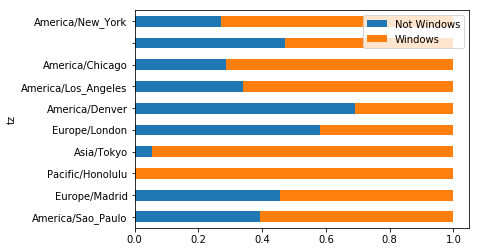

In [33]:
# win / not win 상대적인 비율 보기위해 정규화. sum(1) : 총합이 1이 되도록.
plt.figure()
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)